In [1]:
# importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#defining folder path
path = r'/Users/daniel/Library/CloudStorage/OneDrive-Persönlich/00 Synology/01 Dokumente/2023 Docs/99 CareerFoundry/04 Python/00 Instacart'

In [3]:
# importing ords_prods_cust
ords_prods_cust = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust.pkl'))

In [4]:
# checking
ords_prods_cust.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,first_name,surname,gender,state,age,date_joined,n_dependants,fam_status,income
0,2539329.0,1,1.0,2.0,8.0,NaN,196,1.0,0.0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795.0,1,2.0,3.0,7.0,15.0,196,1.0,1.0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747.0,1,3.0,3.0,12.0,21.0,196,1.0,1.0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736.0,1,4.0,4.0,7.0,29.0,196,1.0,1.0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534.0,1,5.0,4.0,15.0,28.0,196,1.0,1.0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [5]:
ords_prods_cust.shape

(32435059, 33)

You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
In a markdown cell beneath your histogram, describe what the histogram demonstrates.

<Axes: ylabel='Frequency'>

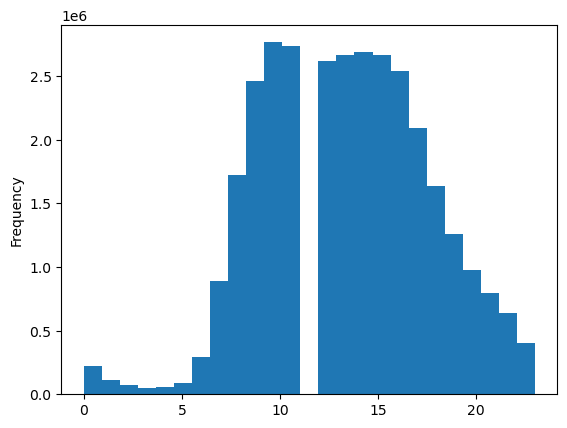

In [6]:
# histogram of order_hour_of_day
ords_prods_cust['order_hour_of_day'].plot.hist(bins = 25)

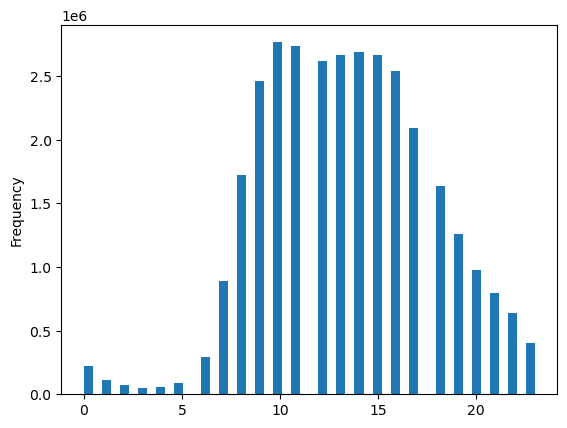

In [7]:
# histogram of order_hour_of_day
hist_order_hour_of_day = ords_prods_cust['order_hour_of_day'].plot.hist(bins = 50)

In [8]:
ords_prods_cust['order_hour_of_day'].describe()

count    3.243506e+07
mean     1.342498e+01
std      4.246357e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.300000e+01
75%      1.600000e+01
max      2.300000e+01
Name: order_hour_of_day, dtype: float64

Orders peak in the morning hours and are on a high stable level until early afternoon. least busienst hours are during the night between 0 and 5 am.

In [9]:
hist_order_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders_hour_of_day.png'))

The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.


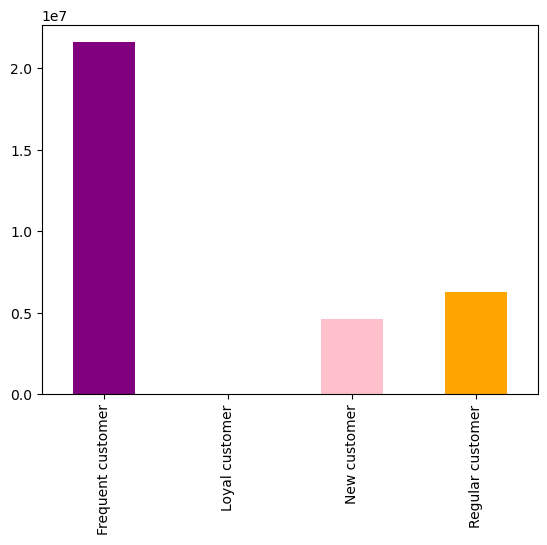

In [10]:
# loyalty bar chart
bar_loyalty_flag = ords_prods_cust['loyalty_flag'].value_counts().sort_index().plot.bar(color =['purple','red','pink','orange','yellow','green','blue'])

In [11]:
bar_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [12]:
#setting the seed
np.random.seed(4)

In [13]:
dev = np.random.rand(len(ords_prods_cust)) <= 0.7

In [14]:
#storing samples into dfs
big = ords_prods_cust[dev]

In [15]:
small = ords_prods_cust[~dev]

In [16]:
# checking number of rows for consistency
len(ords_prods_cust)

32435059

In [17]:
len(small)+len(big)

32435059

In [18]:
#limiting df to 2 columns
df_2 = small[['order_hour_of_day','prices']]

In [19]:
df_2.head()

,order_hour_of_day,prices
0,8.0,9.0
2,12.0,9.0
3,7.0,9.0
6,9.0,9.0
10,9.0,9.0


In [20]:
df_2.shape

(9729960, 2)

In [21]:
small.shape

(9729960, 33)

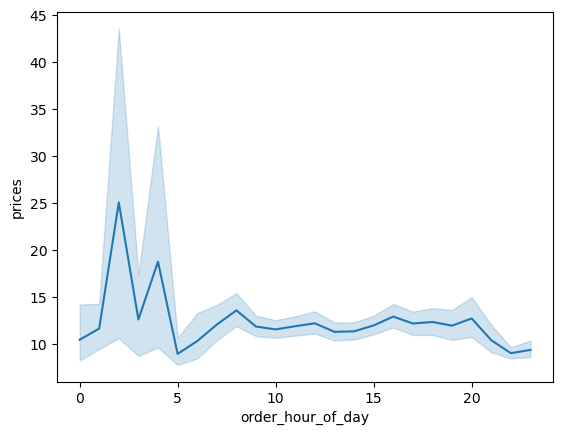

In [22]:
# creating the line chart
line = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

In [23]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_order_hour_and_prices.png'))

Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:
In a markdown cell beneath your line chart, describe what the line chart shows.


In [24]:
#limiting df to 2 columns
df_3 = small[['age','n_dependants']]

In [25]:
df_3.shape

(9729960, 2)

In [26]:
df_3.head()

,age,n_dependants
0,31,3
2,31,3
3,31,3
6,31,3
10,69,0


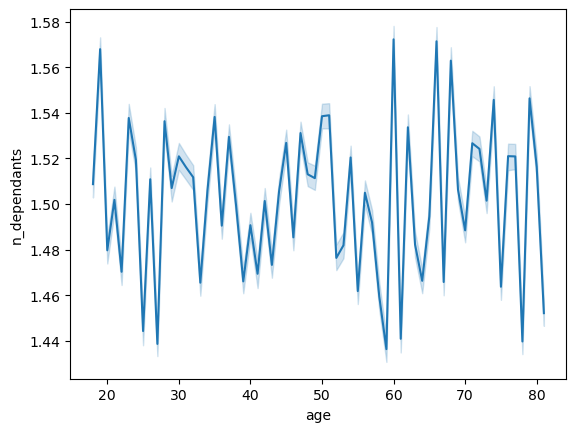

In [27]:
# creating the line chart
line2 = sns.lineplot(data = df_3, x = 'age',y = 'n_dependants')

The number of dependants seems to be highest between 60-70 years. 

In [28]:
line2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_and_dependants.png'))

You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
In a markdown cell beneath your scatterplot, describe what the scatterplot shows.


In [29]:
#limiting df to 2 columns
df_4 = small[['age','income']]

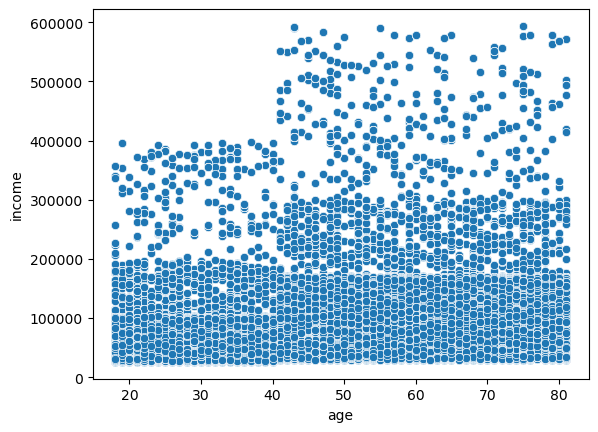

In [31]:
income_age_scatter = sns.scatterplot(x = 'age', y = 'income',data = df_4)

The spending power is increasing with age. Looking at the data, there seems to be a threshold at age 40 where income increases significantly.

In [32]:
income_age_scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_income_age.png'))